Importing Required Libraries



In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.svm import SVR

In [41]:
#import data
dataset = pd.read_csv("insurance.csv")
df = dataset.copy()
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


objectleri değiştirebiliriz

In [43]:
#bozuk veya boş veri var mı diye bakıyoruz
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [44]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


*Verileri Yorumlama*



<Axes: >

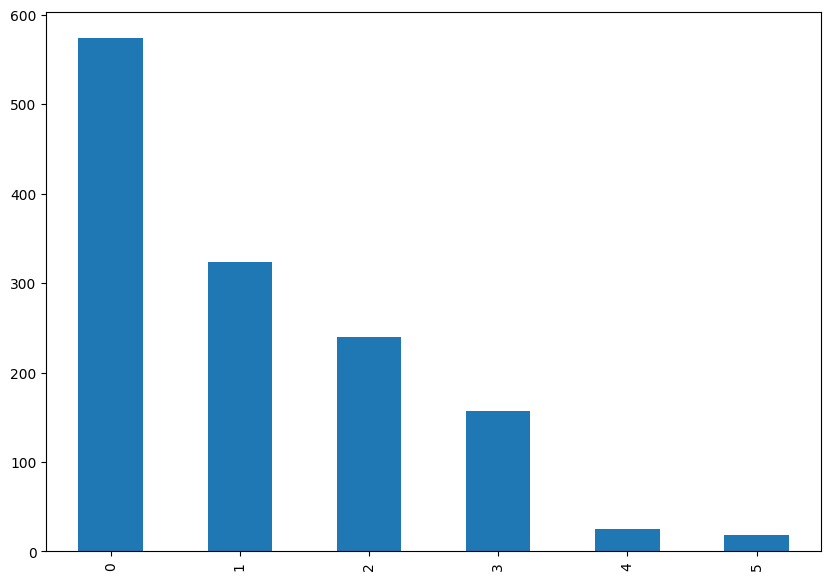

In [45]:
plt.figure(figsize=(10,7))
df["children"].value_counts().plot.bar()

Çocuklara sayısı az yani Avrupa'nın bir data seti diyebiliriz.

<Axes: >

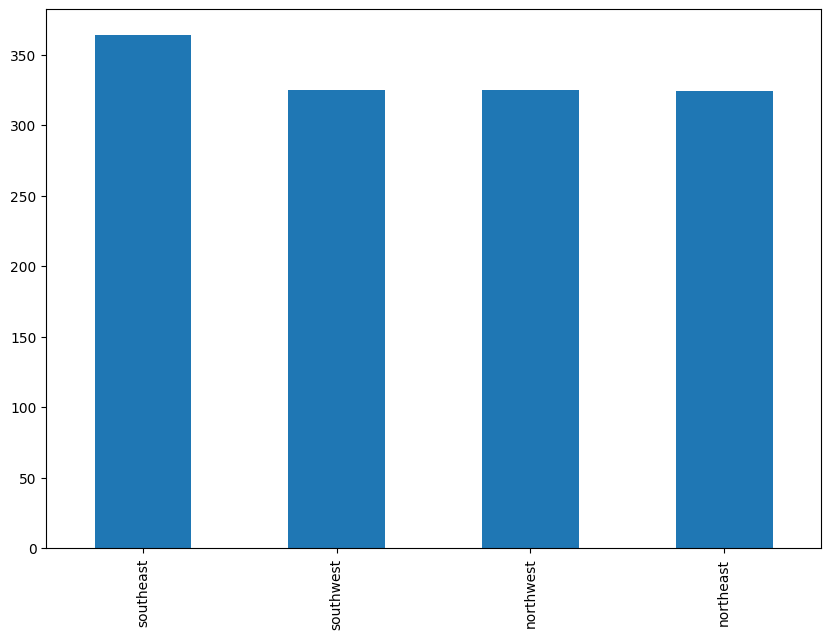

In [46]:
plt.figure(figsize=(10,7))
df["region"].value_counts().plot.bar()

Bölgelerdeki insan sayısı oldukça yakın

In [47]:
df["sex"].value_counts()

male      676
female    662
Name: sex, dtype: int64

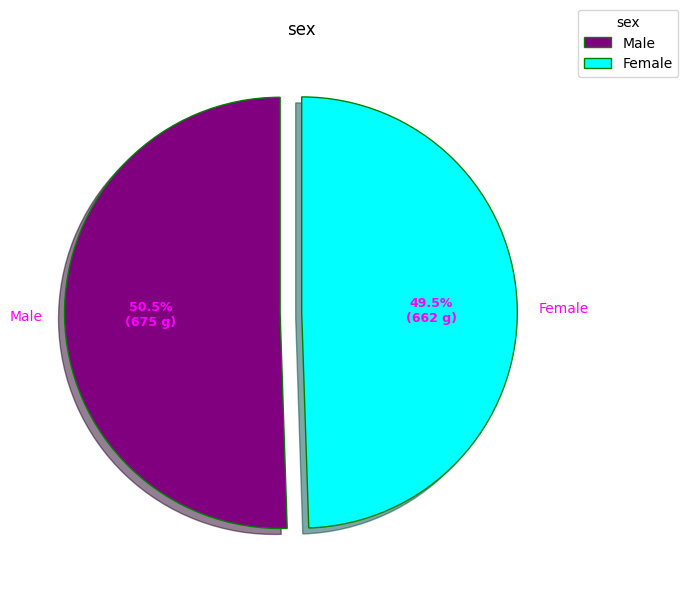

In [48]:
fig, ax = plt.subplots(figsize=(10,7))
sex = ['Male', "Female"]
data = list(df["sex"].value_counts().values)

explode = (0.1, 0.0)

colors= ("purple", "cyan")

wp = {
    "linewidth": 1,
    "edgecolor": "green"
}

def func(pct, allvalues):
  absolute = int(pct / 100 * np.sum(allvalues))
  return "{:.1f}%\n({:d} g)".format(pct, absolute)

wedges, texts, autotexts = ax.pie(data,
                                    autopct = lambda pct: func(pct, data),
                                    explode = explode,
                                    labels = sex,
                                    shadow = True,
                                    colors = colors,
                                    startangle = 90,
                                    wedgeprops = wp,
                                    textprops = dict(color="magenta"))

ax.legend(wedges, sex,
          title="sex",
          loc="center left",
          bbox_to_anchor=(1, 0.5, 0.5, 1))

plt.setp(autotexts, size=9, weight="bold")
ax.set_title("sex")

plt.show()

# Exploratory Data Analysis

**Examine the distribution of Bmi (Body Mass Index)**


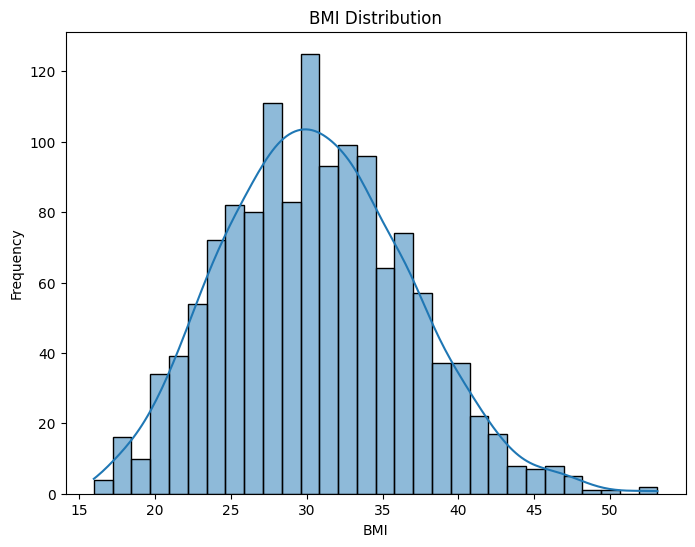

In [49]:
plt.figure(figsize=(8, 6))
sns.histplot(df['bmi'], bins=30, kde=True)
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

Bmi değeri ortalama 30, istenen dağılımda ama daha sonra outlier değer olarak da alabiliriz

<Axes: title={'center': 'Box plot for charges'}, xlabel='charges', ylabel='smoker'>

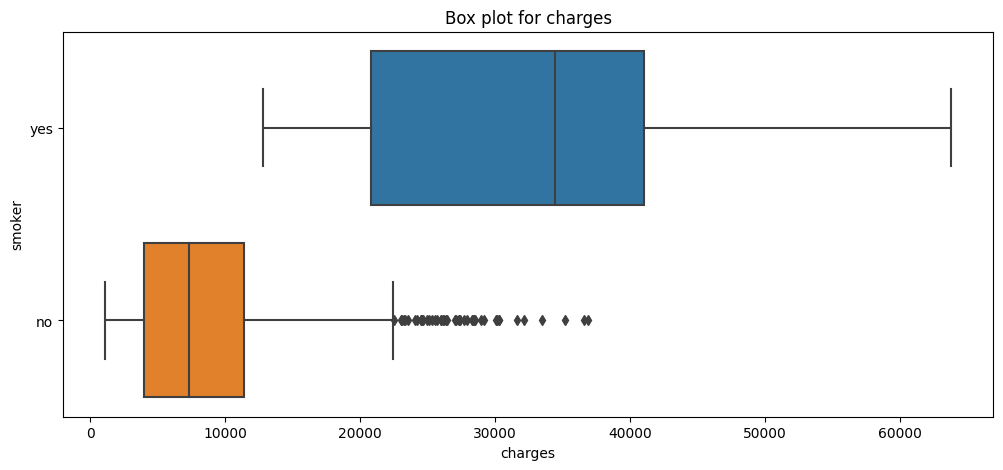

In [50]:
plt.figure(figsize=(12,5))
plt.title("Box plot for charges")
sns.boxplot(y="smoker", x="charges", data =  df, orient="h")

sigara içenlerin içmeyenlere göre masrafı daha çok diyebiliriz.

<Axes: title={'center': '  relationship between “smoker” and “region” '}, xlabel='region', ylabel='count'>

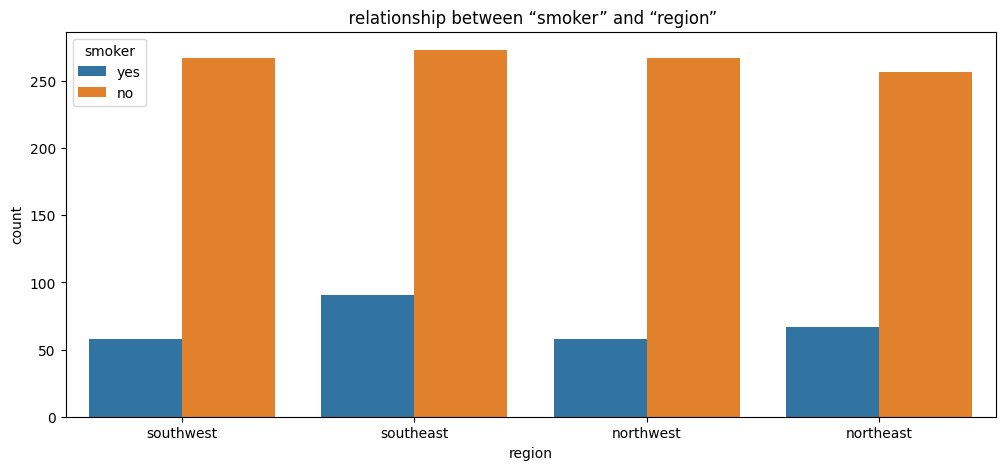

In [51]:
plt.figure(figsize=(12,5))
plt.title("  relationship between “smoker” and “region” ")
sns.countplot(x ='region', hue = "smoker", data = df)

regionlara genel olarak baktığımızda sigara içme ve içmeme durumları birbirlerine oldukça yakın. southest ve northeast de diğerlerine göre sigara içenler daha fazla diyebiliriz fakat çok ayırt edici bir durum değildir.



<Axes: title={'center': '  relationship between “bmi” and “sex” '}, xlabel='bmi', ylabel='count'>

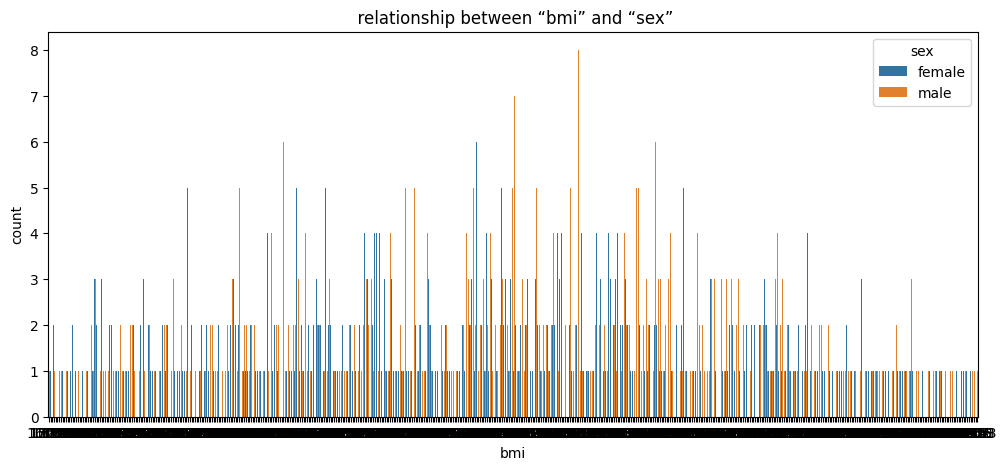

In [52]:
plt.figure(figsize=(12,5))
plt.title("  relationship between “bmi” and “sex” ")
sns.countplot(x ='bmi', hue = "sex", data = df)


Vücut kitle endeksi ile cinsiyet arasındaki ilişki erkeklerde daha fazladır.

**"region" with the most "children"**


<Axes: xlabel='region', ylabel='count'>

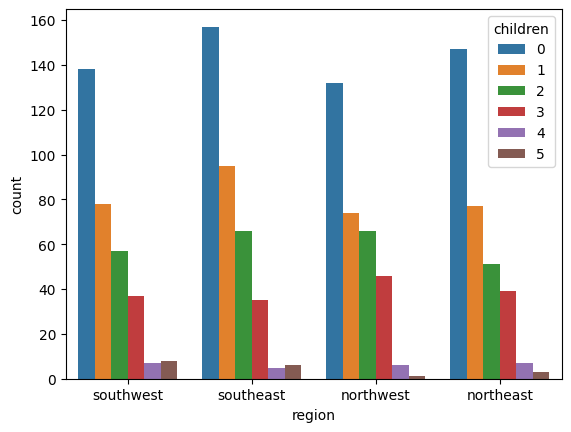

In [53]:
sns.countplot(x ='region', hue = "children", data = df)

Tüm bölgelerde çocuk olmama(0) oranı fazladır, southeast en fazla çocuk sayısına sahip bölgedir.

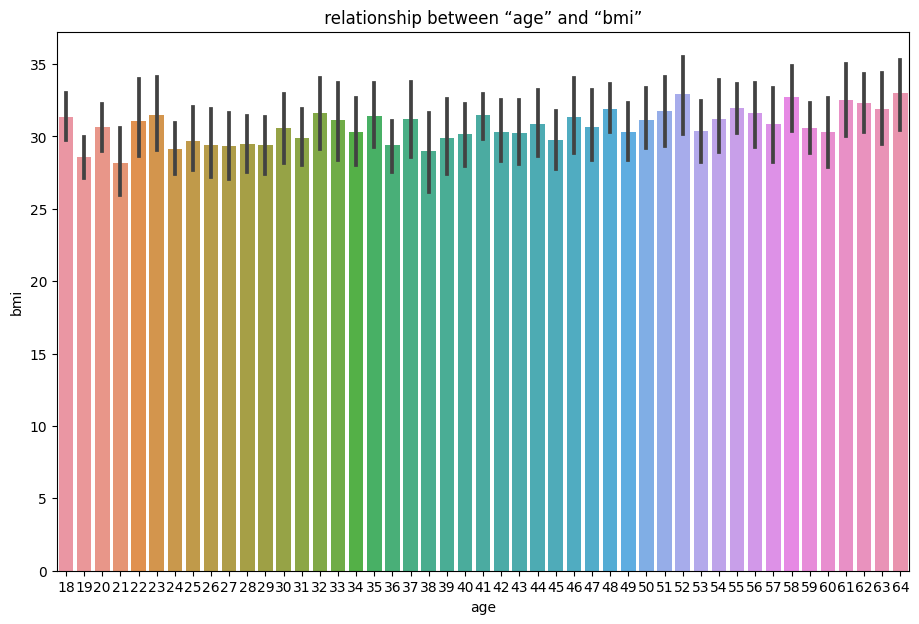

In [54]:
#sayısal görselleştirme
f, ax = plt.subplots(1, 1, figsize=(11, 7))
plt.title(' relationship between “age” and “bmi” ')
ax = sns.barplot(x='age', y='bmi', data=df, )

Bmi ile age doğru orantılı olarak artıyor fakat yine de yaşların bmi'si yaklaşık aynıdır.

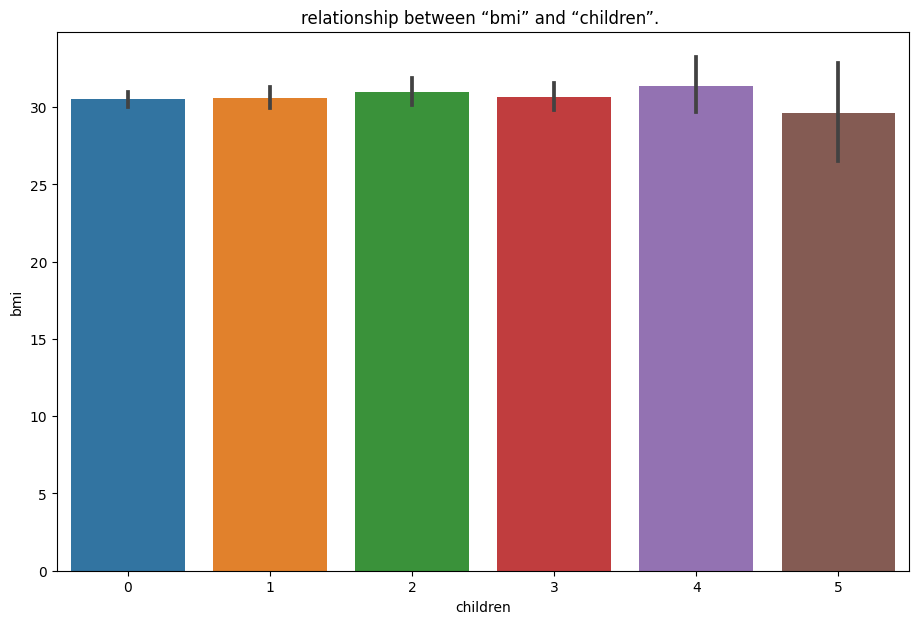

In [55]:
f, ax = plt.subplots(1, 1, figsize=(11, 7))
plt.title('relationship between “bmi” and “children”. ')
ax = sns.barplot(x='children', y='bmi', data=df, )

Bu grafikten bmi ile çocuk sayısı arasında sonuç çıkarmak anlamsızdır.

 **Is there an outlier in the "bmi" variable? Please review.**


<Axes: xlabel='bmi'>

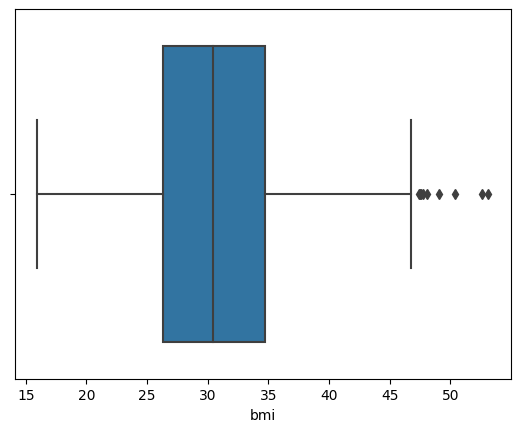

In [56]:
sns.boxplot(x="bmi", data=df)

evet, bmı değerine ait 7 tane aykırı değer vardır. Bmi 45-60 olması mümkün değildir. Veri yanlış işlenmiş olabilir. Kaldırılması gerekiyor.

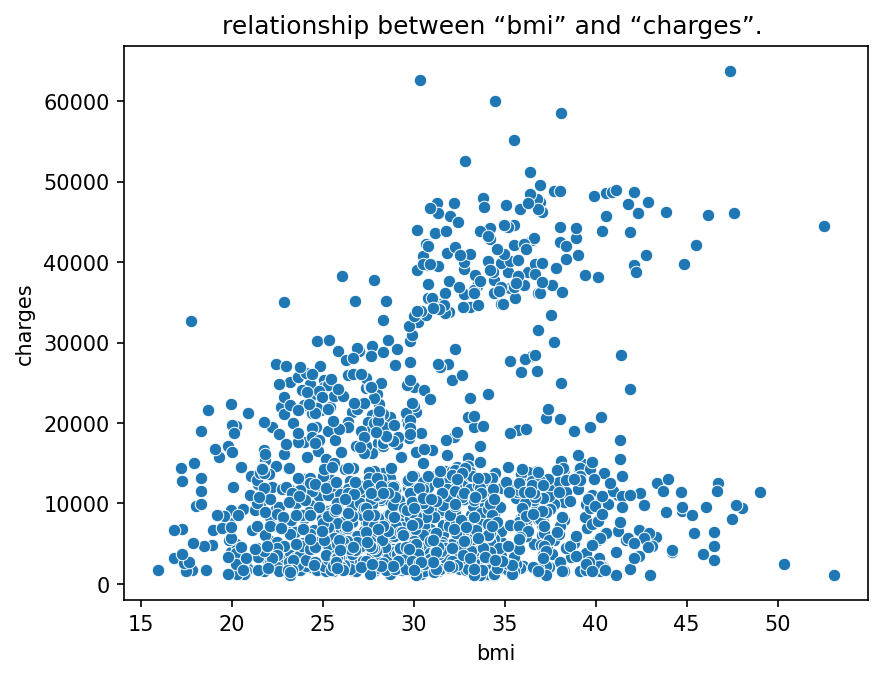

In [57]:
plt.figure(dpi = 150)
plt.title('relationship between “bmi” and “charges”. ')
sns.scatterplot(x=insurance['bmi'], y=insurance['charges'])
plt.show()

Bmi artışının chargesle doğru orantılı olduğunu gözlemleyebiliriz.



**Çubuk grafiğini kullanarak “region”, “smoker” ve “bmi” arasındaki ilişkiyi inceleyin.**

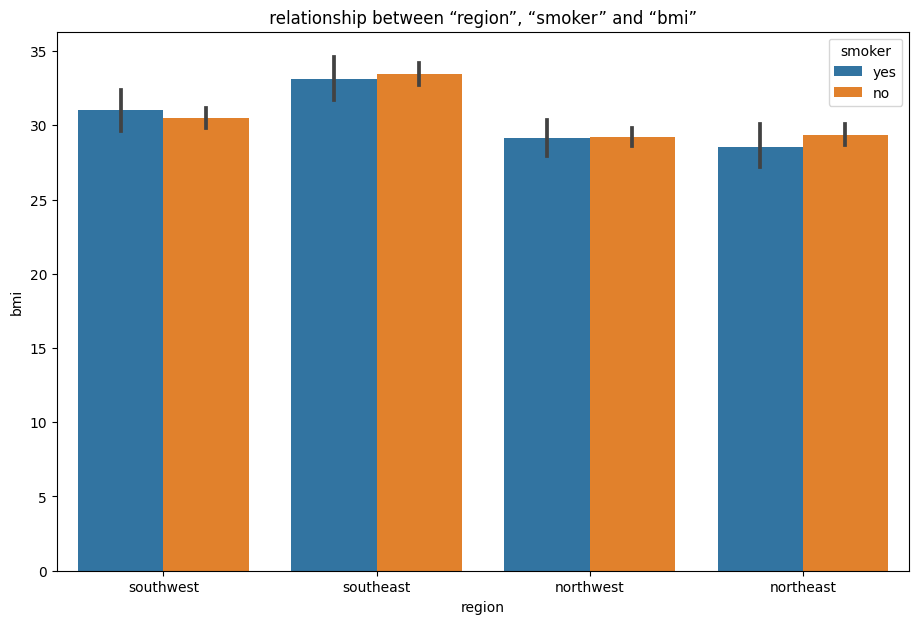

In [58]:
f, ax = plt.subplots(1, 1, figsize=(11, 7))
plt.title(' relationship between “region”, “smoker” and “bmi” ')
sax = sns.barplot(x='region', y='bmi', hue='smoker', data=df, )

Bmi en yüksek southeast bölgesinde görebiliriz ama sigara faktörünün bmi değerlerine kaktısı olduğunu söylemeyiz. Genel olarak baktığımızda aralarında pek anlamlı bir ilişki gözlemleyemiyoruz.

#**Data Preprocessing**

**Label Encoding**

In [59]:
def label_encoding(column_name):
  label_encoder = LabelEncoder()
  df[column_name] = label_encoder.fit_transform(df[column_name])

In [60]:
label_encoding("smoker")
label_encoding("sex")

In [61]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


Veriyi işleme hazır hale getirmek için Label encoding işlemi uyguladık.

In [62]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


**One-Hot Encoding**

In [63]:
one_hot = pd.get_dummies(df["region"])
one_hot.head()

,northeast,northwest,southeast,southwest
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0


In [64]:
df = pd.concat([df, one_hot], axis=1)
df.drop("region", axis=1, inplace=True)
df.head()

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


Tüm datayı numerik dataya çevirdik.

In [65]:
df.info()   #kategorik data kalmadı

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        1338 non-null   int64  
 1   sex        1338 non-null   int64  
 2   bmi        1338 non-null   float64
 3   children   1338 non-null   int64  
 4   smoker     1338 non-null   int64  
 5   charges    1338 non-null   float64
 6   northeast  1338 non-null   uint8  
 7   northwest  1338 non-null   uint8  
 8   southeast  1338 non-null   uint8  
 9   southwest  1338 non-null   uint8  
dtypes: float64(2), int64(4), uint8(4)
memory usage: 68.1 KB


**Scale the dataset**

In [66]:
#(verileri 0-1 arasında ölçeklendirmek için)
X = df.drop("charges", axis=1)
y = df["charges"]

In [67]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X[0:5]

array([[0.02173913, 0.        , 0.3212268 , 0.        , 1.        ,
        0.        , 0.        , 0.        , 1.        ],
       [0.        , 1.        , 0.47914985, 0.2       , 0.        ,
        0.        , 0.        , 1.        , 0.        ],
       [0.2173913 , 1.        , 0.45843422, 0.6       , 0.        ,
        0.        , 0.        , 1.        , 0.        ],
       [0.32608696, 1.        , 0.18146355, 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        ],
       [0.30434783, 1.        , 0.34759214, 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        ]])

**Split the dataset into X_train, X_test, y_train, y_test**

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)

In [69]:
X_train.shape

(1070, 9)

In [70]:
y_train.shape

(1070,)

In [72]:
X_test.shape

(268, 9)

In [73]:
y_test.shape

(268,)

#**Model Selection**

In [74]:
linreg = LinearRegression()
DecTree = DecisionTreeRegressor()
Rand_forest = RandomForestRegressor()
SVM = SVR()

In [75]:
linreg_scores = cross_val_score(linreg,
                                X_train, y_train,
                                scoring="neg_mean_squared_error",
                                cv=10)

In [76]:
linreg_scores #farklı veri bölümleriyle kurulan modellerin elde edilen mse skorları

array([-36875998.62836598, -43307871.90469339, -27392943.335941  ,
       -36545076.53517248, -34064321.21101744, -37545462.85261904,
       -52992268.32309429, -39706839.29685257, -38357145.09175086,
       -32042446.75311643])

In [77]:
DecTree_scores = cross_val_score(DecTree,
                                X_train, y_train,
                                scoring="neg_mean_squared_error",
                                cv=10)

In [78]:
Rand_forest_scores = cross_val_score(Rand_forest,
                                X_train, y_train,
                                scoring="neg_mean_squared_error",
                                cv=10)

In [79]:
svm_scores = cross_val_score(SVM,
                                X_train, y_train,
                                scoring="neg_mean_squared_error",
                                cv=10)

In [80]:
#toplu görmek için
def score_display(scores):
  scores = np.sqrt(-scores)
  print(f"""
  RMSE Scores:{scores},
  Mean: {scores.mean()},
  Standart Deviation: {scores.std()}
  """)

In [81]:
score_display(linreg_scores)


  RMSE Scores:[6072.56112595 6580.87166754 5233.82683473 6045.25239632 5836.4647871
 6127.43525895 7279.57885616 6301.33631041 6193.3145481  5660.60480453],
  Mean: 6133.124658979258,
  Standart Deviation: 517.5126188634559
  


In [82]:
score_display(DecTree_scores)


  RMSE Scores:[6216.01428516 6619.95352268 6581.1386925  6403.34114646 6913.15143481
 6418.53533237 7035.42317167 6229.76329297 6317.95008177 5725.1220194 ],
  Mean: 6446.039297978866,
  Standart Deviation: 353.9011288327172
  


#**Hyper-parameter Optimization**

In [83]:
params = {"n_estimators": [3, 10, 20, 50],
          "n_jobs": [2, 3, 4, 10]}

In [84]:
grid_s = GridSearchCV(Rand_forest, params, cv=5, scoring="neg_mean_squared_error")

In [85]:
grid_s.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'n_estimators': [3, 10, 20, 50],
                         'n_jobs': [2, 3, 4, 10]},
             scoring='neg_mean_squared_error')

In [86]:
grid_s.best_params_

{'n_estimators': 50, 'n_jobs': 3}

In [87]:
for mean_score, params in zip((grid_s.cv_results_['mean_test_score']), grid_s.cv_results_["params"]):
  print(np.sqrt(-mean_score), "------------", params)

5485.174460319797 ------------ {'n_estimators': 3, 'n_jobs': 2}
5423.113429611659 ------------ {'n_estimators': 3, 'n_jobs': 3}
5676.4478274921175 ------------ {'n_estimators': 3, 'n_jobs': 4}
5507.027925978564 ------------ {'n_estimators': 3, 'n_jobs': 10}
5042.828971970258 ------------ {'n_estimators': 10, 'n_jobs': 2}
5140.930525121345 ------------ {'n_estimators': 10, 'n_jobs': 3}
5106.775711099369 ------------ {'n_estimators': 10, 'n_jobs': 4}
5063.360964250243 ------------ {'n_estimators': 10, 'n_jobs': 10}
4983.407491326278 ------------ {'n_estimators': 20, 'n_jobs': 2}
4986.744686803365 ------------ {'n_estimators': 20, 'n_jobs': 3}
4991.890420409525 ------------ {'n_estimators': 20, 'n_jobs': 4}
5010.9643934572305 ------------ {'n_estimators': 20, 'n_jobs': 10}
4978.338722545922 ------------ {'n_estimators': 50, 'n_jobs': 2}
4956.068262655347 ------------ {'n_estimators': 50, 'n_jobs': 3}
4983.254472766381 ------------ {'n_estimators': 50, 'n_jobs': 4}
4971.8713558807885 -----

In [88]:
prediction = grid_s.best_estimator_.predict(X_test)

In [89]:
y_test[0:10].values

array([ 9095.06825,  5272.1758 , 29330.98315,  9301.89355, 33750.2918 ,
        4536.259  ,  2117.33885, 14210.53595,  3732.6251 , 10264.4421 ])

In [90]:
comparison = pd.DataFrame({"Y Test": y_test[0:10].values,
                         "Predictions": prediction[0:10]})

In [91]:
comparison

,Y Test,Predictions
0,9095.06825,10359.127572
1,5272.17580,5401.256335
2,29330.98315,28288.589868
3,9301.89355,13554.835612
4,33750.29180,34685.617376
5,4536.25900,8595.811356
6,2117.33885,2124.652482
7,14210.53595,14499.454475
8,3732.62510,6485.968914
9,10264.44210,11013.146724


In [92]:
def regression_evaluation(preds):
  mse = mean_squared_error(y_test, preds)
  rmse = np.sqrt(mse)
  r_squared = r2_score(y_test, preds)
  mae = mean_absolute_error(y_test, preds)

  print(f"Mean Absolute Error: {mae} \nMean Squared Error: {mse} \nRoot Mean Squared Error: {rmse} \nR-Squared Value: {r_squared}")

In [93]:
regression_evaluation(prediction)

Mean Absolute Error: 2558.4396089256834 
Mean Squared Error: 21329977.59145356 
Root Mean Squared Error: 4618.438869515711 
R-Squared Value: 0.8626077173932734


In [94]:
#güven aralığı
from scipy import stats

confidence = 0.95

squared_errors = (prediction - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1, loc=squared_errors.mean(), scale=stats.sem(squared_errors)))

array([3686.26293312, 5391.79198141])